# <center><b> Python Programming in Energy Science I</b></center>

## <center> Assignments A4, A5, A6 </center>

### <center>[Group 4]</center>
<center> Juan Manuel Boullosa Novo </center>
<center> Julia Guimaraes Zimmer </center>
<center> Jiah Ryu </center>
<center> Emre Atalan </center>

-------------------------------

## <center> Assignment A4 </center>
-------------------------------

### E12. Array Calculations

Do not use loops over the time dimension for this exercise!

• Create a numpy array called t that represents N = 5000 time values between 0 and 60 seconds (both included).

• Create another single numpy array called data, which represents sin(ωt), cos(ωt) for the following choices of angular frequency: ω = 2π/60s, 2π/30s, 2π/100s, 2π/120s.

• Make one nice plot showing all of the lines (both functions, all frequencies) with a descriptive legend.

• Now add two more functions to the data: sin2  and cos2, by extending the corresponding dimension in thearray. Repeat the plotting, but now showing only the newly added quadratic functions.

• Sum all sin and sin2 functions, for all frequencies, into one new numpy array. Similarly sum all cos and cos2 results into another array. Plot both, and also their sum, into one plot.

Little Test:
first omega of sin len: 5000
first omega of cos len: 5000
t-shape: (5000,)


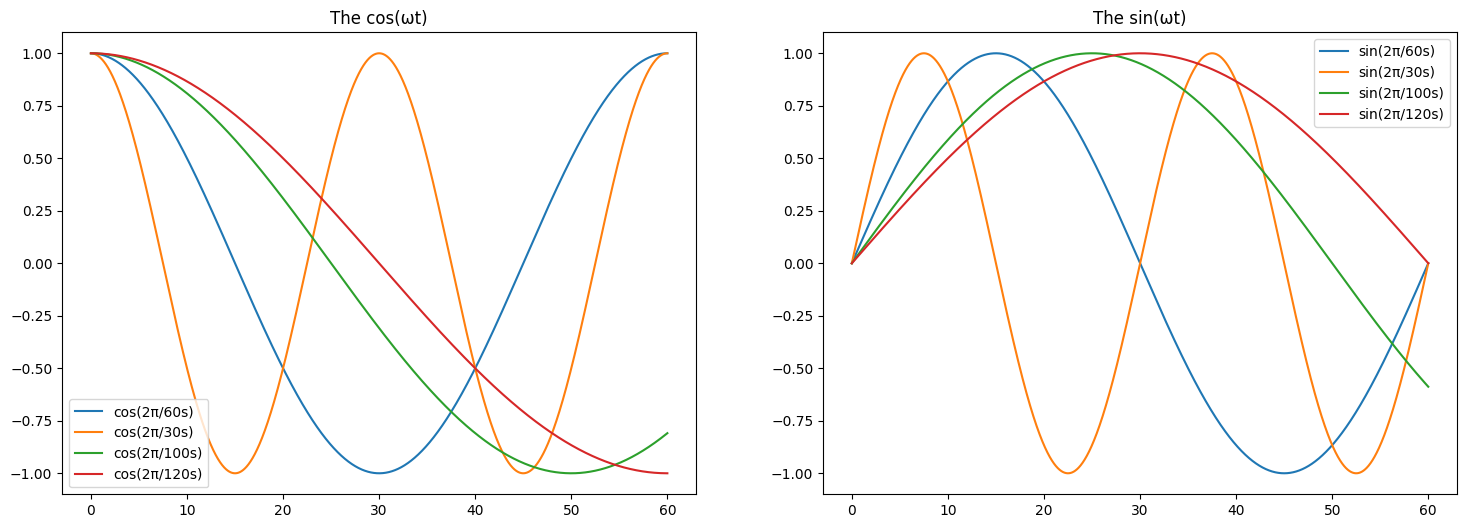

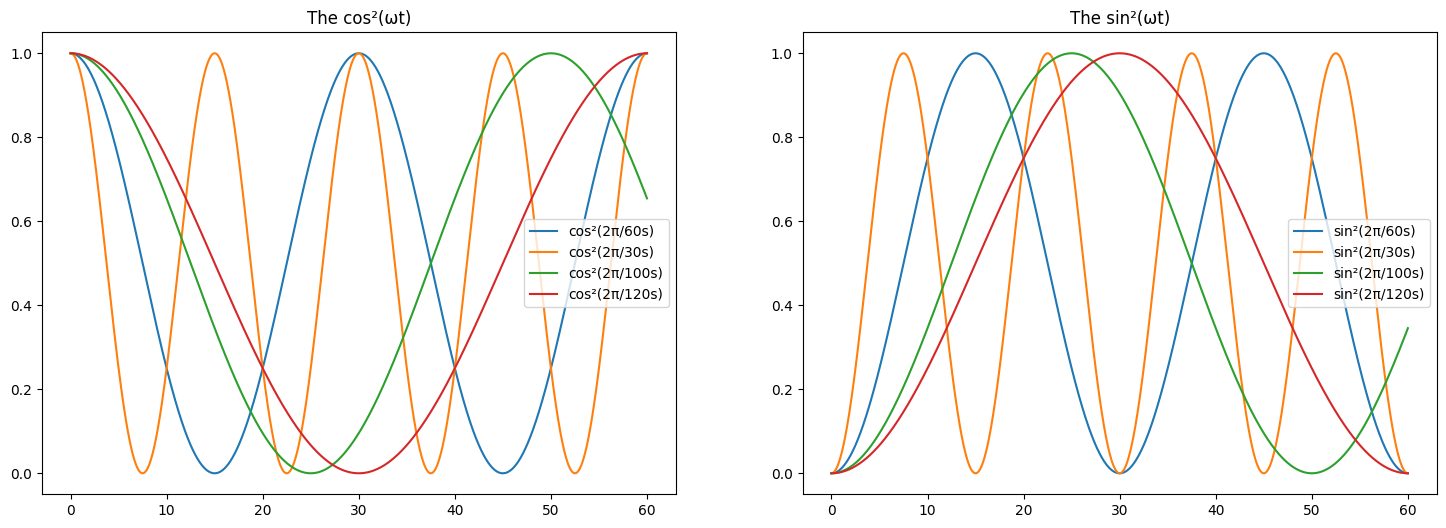

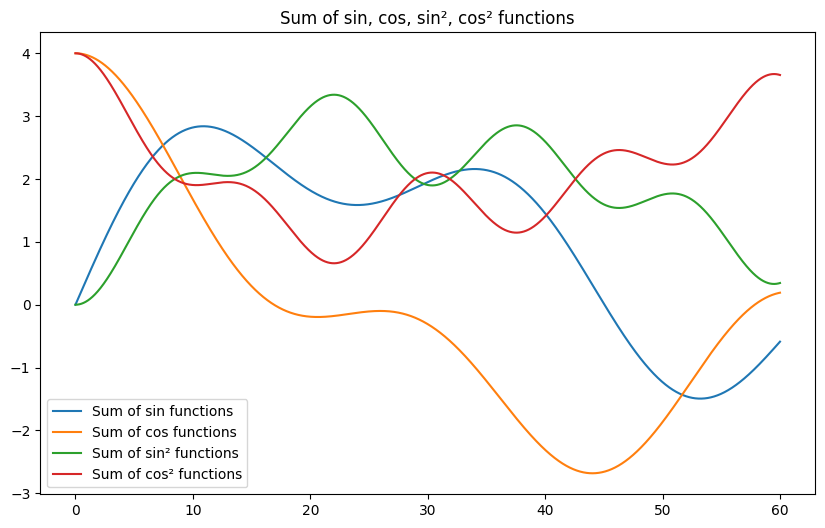

In [38]:
import numpy as np                    #we import the  necessary libiraries ,numpy is for numerical operations and matplotlip for 
import matplotlib.pyplot as plt       #plotting

# Create the time array              #we created a  time array of 5000 values spaced betwween 0 to 60 seconds(0 and 60 are included) 
N = 5000                              
t = np.linspace(0, 60, N)

# Create the data array for sin(ωt) and cos(ωt)
omega_values = [2 * np.pi / 60, 2 * np.pi / 30, 2 * np.pi / 100, 2 * np.pi / 120]
data_sin = np.sin(np.outer(t, omega_values))    #we created a 2D arrays by using np.outer which is a numpy function computes  
data_cos = np.cos(np.outer(t, omega_values))    #the outer product of two vectors which is refers here to (t,omega_values) 
                                                #with these 2 functions we calculate the sin and cos values for different
                                                #angular frequencies over time (corresponds to colum)

# Create sin^2 and cos^2 functions for each angular frequency 
data_sin2 = np.square(data_sin)   
data_cos2 = np.square(data_cos)

# Sum sin and sin^2 functions, cos and cos^2 functions  
sum_sin = np.sum(data_sin, axis=1)                         #here is the sum of sin ,sin2,cos,cos2 values along the columns
sum_sin2 = np.sum(data_sin2, axis=1)                       #for each row                             #add both in one array 
sum_cos = np.sum(data_cos, axis=1)
sum_cos2 = np.sum(data_cos2, axis=1)

#little test, if data and t have the same size
print("Little Test:") 
print(f"first omega of sin len: {len(data_sin[:,0])}")
print(f"first omega of cos len: {len(data_cos[:,0])}")
print(f"t-shape: {t.shape}")

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the cos functions in the first subplot
axs[0].plot(t, data_cos[:, 0], label='cos(2π/60s)')
axs[0].plot(t, data_cos[:, 1], label='cos(2π/30s)')
axs[0].plot(t, data_cos[:, 2], label='cos(2π/100s)')
axs[0].plot(t, data_cos[:, 3], label='cos(2π/120s)')
axs[0].legend()
axs[0].set_title('The cos(ωt)')

# Plot the sin functions in the second subplot
axs[1].plot(t, data_sin[:, 0], label='sin(2π/60s)')
axs[1].plot(t, data_sin[:, 1], label='sin(2π/30s)')
axs[1].plot(t, data_sin[:, 2], label='sin(2π/100s)')
axs[1].plot(t, data_sin[:, 3], label='sin(2π/120s)')
axs[1].legend()
axs[1].set_title('The sin(ωt)')

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the cos functions in the first subplot
axs[0].plot(t, data_cos2[:, 0], label='cos²(2π/60s)')
axs[0].plot(t, data_cos2[:, 1], label='cos²(2π/30s)')
axs[0].plot(t, data_cos2[:, 2], label='cos²(2π/100s)')
axs[0].plot(t, data_cos2[:, 3], label='cos²(2π/120s)')
axs[0].legend()
axs[0].set_title('The cos²(ωt)')

# Plot the sin functions in the second subplot
axs[1].plot(t, data_sin2[:, 0], label='sin²(2π/60s)')
axs[1].plot(t, data_sin2[:, 1], label='sin²(2π/30s)')
axs[1].plot(t, data_sin2[:, 2], label='sin²(2π/100s)')
axs[1].plot(t, data_sin2[:, 3], label='sin²(2π/120s)')
axs[1].legend()
axs[1].set_title('The sin²(ωt)')            
                                                                  
# Plot summed functions
plt.figure(figsize=(10, 6))
plt.plot(t, sum_sin, label='Sum of sin functions')
plt.plot(t, sum_cos, label='Sum of cos functions')
plt.plot(t, sum_sin2, label='Sum of sin² functions')
plt.plot(t, sum_cos2, label='Sum of cos² functions')
plt.legend()
plt.title('Sum of sin, cos, sin², cos² functions')

# Show the plots
plt.show()                 # we used show to display all the plots we've created 

### E13. Data Creation - Do not use loops for this exercise!


• Create a numpy array that represents dimensions (hour, minute, index, data), for a single day of measurements (hours: 0-23 minutes:0-59), where the index indicates 5 different weather stations and the data 3 data entries per location, filled with zeros of type np.float64. Print the shape and the dtype of your array. How many elements are contained in the array?

• Assume the 3 data entries represent solar irradiance in W/m2, temperature in Kelvin and wind speed in m/s at 10 m height respectively. Set all solar irradiance values to 250 W/m2, then replace all values for the time between 9 PM and 5 AM to zero. Check that this worked as intended, by printing appropriate slices.

• Create another numpy array representing dimensions (minute, index) with random values between 3 and 8 m/s. Set all wind speed data for all stations to that data, such that it repeats every hour. Check that this worked as intended, by printing appropriate slices.

• Fill the temperature data with random values between 5 and 20 degrees Celsius (translate that into Kelvin). Station 2 has some problem during nights, so replace all temperatures by np.nan between 9 PM and 5 AM. Station 0 and 1 do not work correctly at high wind speeds, so replace the temperature by np.nan whenever the wind speed is above or equal 6 m/s for those stations. Again, check that this worked as intended.

INFOS FOR THE CODE:

**INFO 1:**
- tile to repeat
- contains 24 arrays for the hours. 
- Each of them contains 60 values for the min
- shape = (24, 60)

**INFO 2:** 
- 5 = 5 wheather stations; 
- 4 = [solar irradiance], [temperature],[wind speed],[one_day_in_min]
- 24 = [solar irradiance: [hour1][hour2]...[hou24]]; [temp.: [hour1][hour2]...[hou24]]...
- 60 = [solar irradiance: hour1: min1, min2,.., min60]

In [44]:
import numpy as np
#########################13.1#############################
# array represents one day in minutes (INFO 1)
one_h_in_min = np.arange(60) 
one_day_in_min = np.tile(one_h_in_min, (24,1)) 

# Create the main array with the specified shape, full with zeros: (INFO 2)
main_array = np.zeros((5, 4, 24, 60), dtype=np.float64)

# Fill the fourth array in the second dimension with the minutes
main_array[:, 3, :, :] = one_day_in_min

# print the shape and type of the array
print(f"13.1: Main array has the shape = {main_array.shape} type = {type(main_array)}")

# How many elements are contained in the array
print("13.1: Elements of the array:", len(main_array),"\n")
print("13.1: Items inside the array: 5*4*24*60 = ", 5*4*24*60 ,"\n")

#########################13.2#############################
# Set all solar irradiance values to 250 W/m2
main_array[:, 0, :, :] = 250.0

# Change the first 6 and the last 3 values to zero: 
main_array[:, 0, :6, :] = 0.0 #from 00:00 to 05:00 am 
main_array[:, 0, -3:, :] = 0.0 #from 09:00 pm to 00:00 am 

#printing all 5 stations, 1st array = solar irr., at 09:00 pm (21)
print("13.2: Check solar irradiance 21:00 (all stations):\n", main_array[:,0,21,:],"\n") 

# printing all 5 stations, 1st array = solar irr., at 08:00 pm (20)
print("13.2: Check solar irradiance 20:00 (all stations):\n", main_array[:,0,20,:], "\n") 

#########################13.3#############################
#create array with random wind speeds btw. 3 - 8
wind_speed_array = (np.random.randint(3,8,(5, 24, 60)))

# set wind speeds in the main array: 
main_array[:, 2, :, :] = wind_speed_array

#check if wind speed is in main: 
print("13.3: Wind speeds at station 1 at 21:00 and 22:00:", main_array[0,2,[21,22],:] ,"\n", 
     "\n", "station 2 at 21:00 and 22:00::\n",  main_array[1,2,[21,22],:],"\n")

#########################13.4#############################
#fill in temperature values 
temperature_array = np.random.randint(5,20,(5, 24, 60))+273.15
main_array[:, 1, :, :] = temperature_array

#problems of station 2:
main_array[2, 1, :6, :] = np.nan #from 00:00 to 05:00 am 
main_array[2, 1, -3:, :] = np.nan #from 09:00 pm to 00:00 am 

#problems with station 0 and 1: 
main_array[0, 1,:,:,][main_array[0,2,:,:]>= 6] = np.nan #selelctedarray[][condition]
main_array[1, 1,:,:,][main_array[1,2,:,:]>= 6] = np.nan

print("13.4: Temperatures at station 2 at 20:00 and 21:00:\n", main_array[2,1,[20,21],:], 
      "\n", "13.4:Temp. at station 0 at 20:00:\n",  main_array[0,1,[20],:], "\n"
      "\n", "13.4: temp.s at station 1 at 21:00:\n",  main_array[1,1,[21],:],"\n"
      "\n", "Wind Speed at station 1 at 21:00:",  main_array[1,2,[21],:],"\n")


13.1: Main array has the shape = (5, 4, 24, 60) type = <class 'numpy.ndarray'>
13.1: Elements of the array: 5 

13.1: Items inside the array: 5*4*24*60 =  28800 

13.2: Check solar irradiance 21:00 (all stations):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### E14 Wind Farm Data: Part 1

The provided data file results_farm.csv.gz has a single header line, stating the column names: 

State,turbine,YAW,WD,AMB_WS,WS,AMB_P,P GY,NY,P75,P90,EFF,WLOSS 

The State column contains integer numbers, indexing 30-minute time average data (the time stamp itself has been removed, since it is not needed here).

• Read the file results_farm.csv.gz into a numpy.ndarray, ignoring the first row (i.e., the above header line). Print the first 10 rows of data. Note that you do not need to extract the gz file before reading it with numpy.

• Select the subset of the data for which the produced power is zero. What is the maximal ambient wind speed AMB_WS in this subset? What the minimal wake-corrected wind speed WS in another subset with power greater than zero? The data unit in both cases is m/s

• How many turbines are in the wind farm? Create a separate numpy array for each turbine (use at most a single loop). Then, find out how much mean power P was produced by each turbine with respect to the states. The unit of P in the data is kW. How high is the annual energy production (AEP) in GWh based on this data for the whole farm?

#### Notes E14 
- E14.3: unique function: For example, if your turbine indices are like [0, 1, 2, 0, 1, 3], then unique_turbines will be [0, 1, 2, 3]. This allows us to iterate over each unique turbine in the subsequent loop and perform operations specific to each turbine.

In [1]:
import numpy as np
import gzip
###################################E14.1####################################
# Specify the file path
file_path = 'results_farm.csv.gz'

# Read the gzipped CSV file using numpy and skip the header
with gzip.open(file_path, 'rt') as file:
    # Skip the header line
    next(file)
    # Use numpy to load the data
    data_array = np.loadtxt(file, delimiter=',')

# Print the first 10 rows of the data
#print(f"E14.1: Data_array_shape: {data_array.shape}\n \n")
print(data_array[:10, :])

###################################E14.2####################################

# Extract the relevant columns
ambient_wind_speed = data_array[:, 4]  # AMB_WS column
wake_corrected_wind_speed = data_array[:, 5]  # WS column
produced_power = data_array[:, 7]  # P column - power 

# Subset with produced power equal to zero
zero_power_subset = data_array[produced_power == 0]
max_ambient_wind_speed_zero_power = np.max(zero_power_subset[:, 4])

# Subset with power greater than zero
positive_power_subset = data_array[produced_power > 0]
min_wake_corrected_wind_speed_positive_power = np.min(positive_power_subset[:, 5])

# Print the results
print("E14.2: Maximal ambient wind speed (AMB_WS) when produced power is zero:", max_ambient_wind_speed_zero_power, "m/s")
print("E14.2: Minimal wake-corrected wind speed (WS) when power is greater than zero:", min_wake_corrected_wind_speed_positive_power, "m/s\n\n")

###################################E14.3####################################
# Extract unique turbine IDs from the 'turbine' column 
unique_turbines = np.unique(data_array[:, 1])

# Print the number of turbines in the wind farm
num_turbines = len(unique_turbines)
print(f'E14.3: The wind farm has {num_turbines} turbines.')

#Create a 3D numpy array to store separate 2D arrays for each turbine
turbine_3d = np.zeros((num_turbines, data_array.shape[0] // num_turbines, data_array.shape[1]), dtype=np.float64)

# Fill the turbine_3d array with the data from data_array (filtered)
for i, turbine_id in enumerate(unique_turbines):
    turbine_data = data_array[data_array[:, 1] == turbine_id]       #turbine_data contains only data from current turbine 
    turbine_3d[i, :, :] = turbine_data                              #assigns each turbine i in one array

#test: print the shape and type of the 3_d array
print(f"E14.3.: turbine_3d type = {type(turbine_3d)}, shape of turbine_3d = {turbine_3d.shape}\n")

# Example: Print the first 5 rows of data for the 3 turbine
#print(f'E14.3: Data for turbine ID {unique_turbines[3]}:')
#print(turbine_3d[3, :5, :]) #first 5 rows (timestamps)

# Extract relevant columns from turbine_3d
power_data = turbine_3d[:, :, 7]  # Assuming 'P' column is at index 7

# Calculate mean power produced by each turbine with respect to the states
mean_power = np.mean(power_data, axis=1) #np array with 1 axis (67,)
annual_hours_with_wind = 1600 

# Calculate annual energy production (AEP) for the whole farm 
aep_kwh = np.sum(mean_power) * annual_hours_with_wind
aep_gwh = aep_kwh / 1e6

# Print mean power produced by each turbine with respect to the states
print("E14.3: Mean Power by State:")
for i, mean_power in enumerate(mean_power):
    print(f"Turbine {i+1}: {mean_power:.2f} kW")

# Print annual energy production (AEP) for the whole farm
print(f"\nE14.3: Annual Energy Production (AEP) for the whole farm: {aep_gwh:.2f} GWh")



E14.1: Data_array_shape: (201067, 14)
 

E14.2: Maximal ambient wind speed (AMB_WS) when produced power is zero: 4.1298 m/s
E14.2: Minimal wake-corrected wind speed (WS) when power is greater than zero: 3.0003 m/s


E14.3: The wind farm has 67 turbines.
E14.3.: turbine_3d type = <class 'numpy.ndarray'>, shape of turbine_3d = (67, 3001, 14)

E14.3: Mean Power by State:
Turbine 1: 4053.12 kW
Turbine 2: 3832.85 kW
Turbine 3: 4014.93 kW
Turbine 4: 3974.15 kW
Turbine 5: 3961.45 kW
Turbine 6: 4120.61 kW
Turbine 7: 3920.48 kW
Turbine 8: 3973.83 kW
Turbine 9: 3935.51 kW
Turbine 10: 3831.59 kW
Turbine 11: 3952.85 kW
Turbine 12: 3963.28 kW
Turbine 13: 3946.18 kW
Turbine 14: 3865.12 kW
Turbine 15: 4106.79 kW
Turbine 16: 3884.75 kW
Turbine 17: 4018.72 kW
Turbine 18: 4015.72 kW
Turbine 19: 3947.40 kW
Turbine 20: 3955.98 kW
Turbine 21: 3990.90 kW
Turbine 22: 3878.06 kW
Turbine 23: 3917.66 kW
Turbine 24: 4154.78 kW
Turbine 25: 3948.48 kW
Turbine 26: 3897.10 kW
Turbine 27: 4057.83 kW
Turbine 28: 3944.

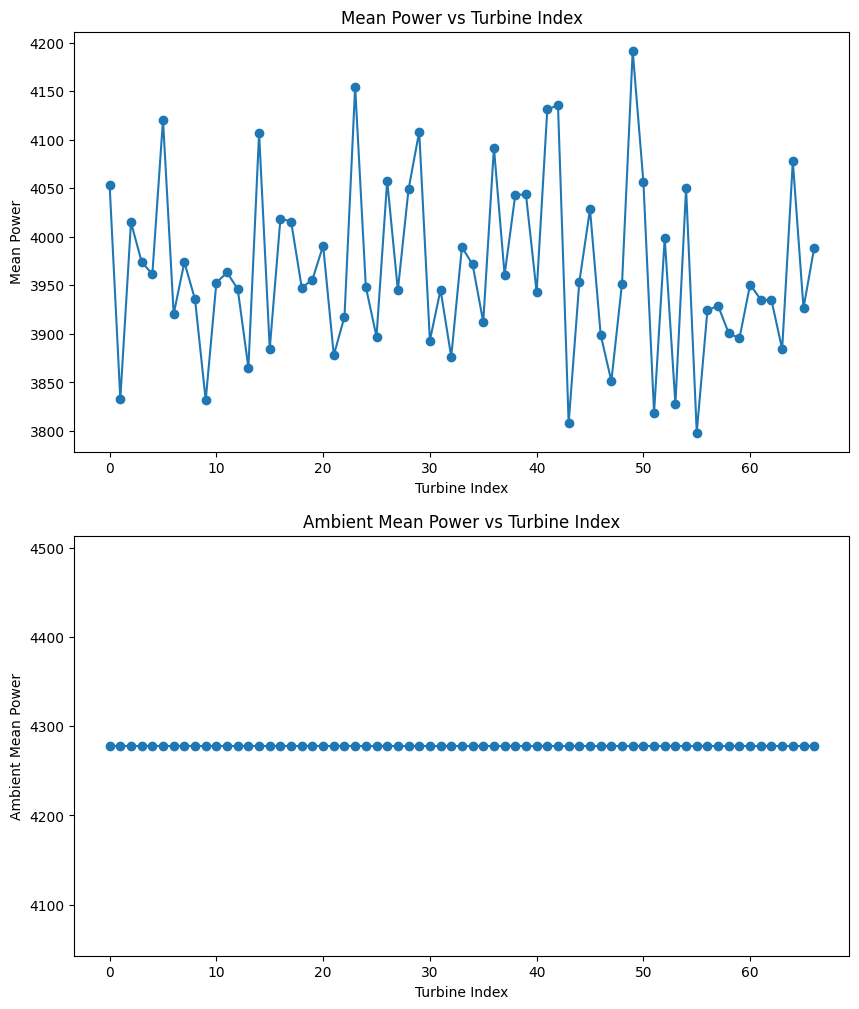

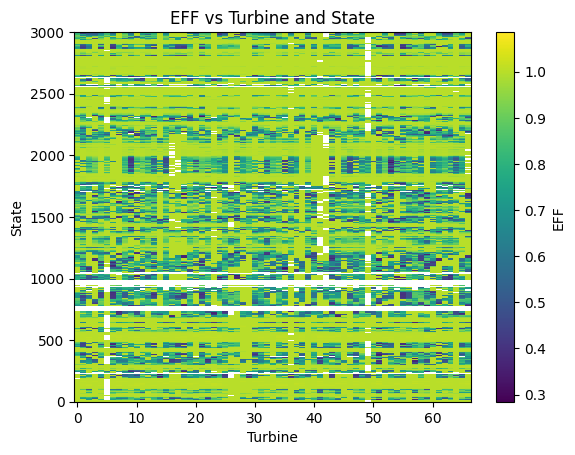

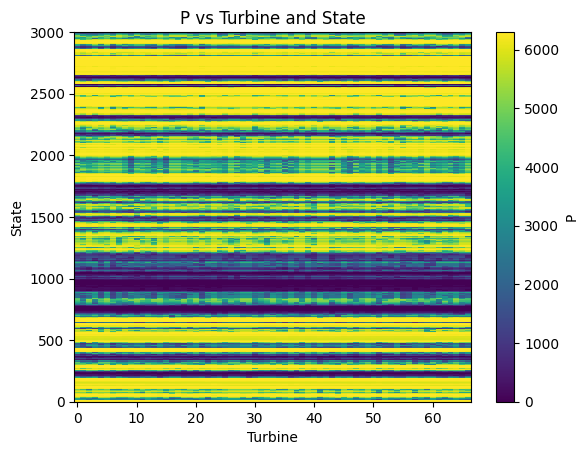

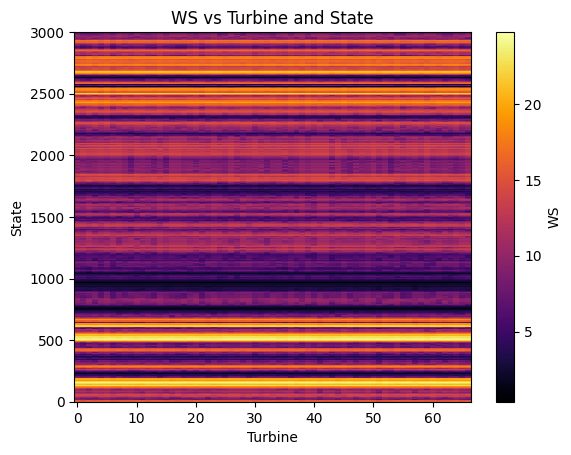

In [49]:
###################################E15.1 Julia ####################################
import numpy as np
import matplotlib.pyplot as plt

# Extract relevant columns from turbine_3d
power_data = turbine_3d[:, :, 7]  # Assuming 'P' column is at index 7
AMB_power_data = turbine_3d[:, :, 6]
#test print:
#print(data_array[2000:3000,6]) #Ex.:60:120: specifies from index 60 to 119

# Calculate mean power produced by each turbine with respect to the states
mean_power = np.mean(power_data, axis=1) #np array with 1 axis (67,)
AMB_mean_power = np.mean(AMB_power_data, axis=1) 
turbine_indices = np.arange(67) # Create an array of indices (turbine indices)

# Plot mean_power and AMB_mean Power against turbine index
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(2, 1, figsize=(10, 12))


axs[0].plot(turbine_indices, mean_power, marker='o', linestyle='-')
axs[0].set_xlabel('Turbine Index')
axs[0].set_ylabel('Mean Power')
axs[0].set_title('Mean Power vs Turbine Index')

axs[1].plot(turbine_indices, AMB_mean_power, marker='o', linestyle='-')
axs[1].set_xlabel('Turbine Index')
axs[1].set_ylabel('Ambient Mean Power')
axs[1].set_title('Ambient Mean Power vs Turbine Index')
plt.show()

###################################E15.2 Julia####################################
turbine_3d[:,:,12][turbine_3d[:,:,12] <= 0] = np.nan #array[selected area[condition]

# 2D plot of EFF vs turbine and state
plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,12])
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('EFF vs Turbine and State')
plt.colorbar(label='EFF')
plt.show()

###################################E15.3 Julia####################################
# 2D plot of power vs turbine and state
plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,7], cmap='viridis')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('P vs Turbine and State')
plt.colorbar(label='P')
plt.show()

plt.figure()
plt.pcolormesh(turbine_3d[:,:,1], turbine_3d[:,:,0], turbine_3d[:,:,5], cmap='inferno')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('WS vs Turbine and State')
plt.colorbar(label='WS')
plt.show()

### E15: Wind Farm Part 2

• Read the data from E14 into a single numpy array, as described there.

• Create a simple line plot, showing the mean ambient power AMB_P and the mean produced power P wrt. the states, as a function of turbine index. Include axes labels, a legend and a title.

• Replace all values of the wind turbine efficiency EFF by np.nan if they are zero (or below). Then create a 2D pcolormesh plot that shows the variable EFF as a function of turbine on x-axis and state on the y-axis, with coordinate (0, 0) in the lower left corner. Make the plot as pretty as you can, e.g., add axes labels, a title, and a color bar. Follow the lecture on matplotlib, but please, no red lines between the data squares.


• Similarly, create two beautiful pcolormesh plots showing the wind speed WS and the produced power P. Use different color maps for each of the latter three 2D-plots, and always show color bars. You may also use other ways of visualizing this 2D data than pcolormesh, if you prefer (but please not just a bunch of single lines).


(3001,)


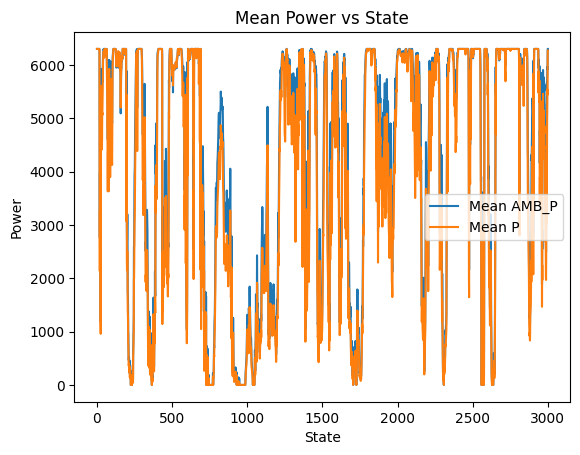

(3001, 67)


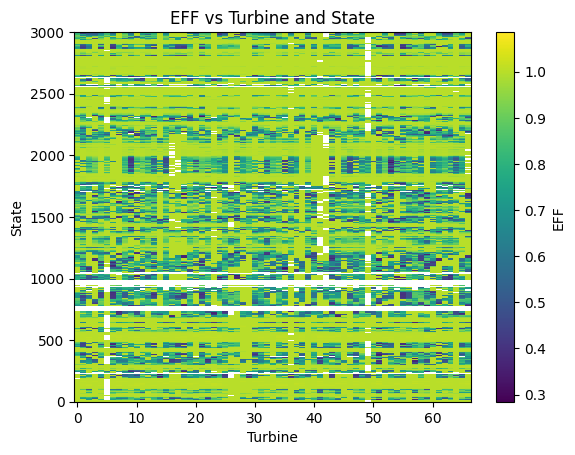

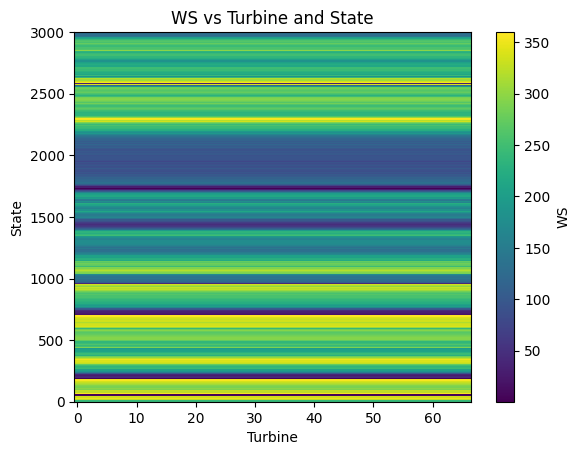

KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('results_farm.csv.gz', delimiter=',', skip_header=1)

states = np.unique(data[:, 0])
turbines = np.unique(data[:, 1]) #shape (67,)
# iterate over states: where first column ==  current state
# ->extract values from column 6 (AMB_P) and calc. mean of it (same for P) 
mean_AMB_P = np.array([np.mean(data[data[:, 0] == state, 6]) for state in states])   #shape(3001,)
print(mean_AMB_P.shape)
mean_P = np.array([np.mean(data[data[:, 0] == state, 7]) for state in states])

plt.figure()
plt.plot(states, mean_AMB_P, label='Mean AMB_P')
plt.plot(states, mean_P, label='Mean P')
plt.xlabel('State')
plt.ylabel('Power')
plt.title('Mean Power vs State')
plt.legend()
plt.show()

# EFF = data[:, 12]
data[:, 12] = np.where(data[:, 12] <= 0, np.nan, data[:, 12])

# Reshape the data to 2D
EFF = data[:, 12].reshape(len(states), len(turbines))
WS = data[:, 3].reshape(len(states), len(turbines))
P = data[:, 7].reshape(len(states), len(turbines))

print(EFF.shape)

# 2D plot of EFF vs turbine and state
plt.figure()
plt.pcolormesh(turbines, states, EFF)
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('EFF vs Turbine and State')
plt.colorbar(label='EFF')
plt.show()

# 2D plot of wind speed vs turbine and state
plt.figure()
plt.pcolormesh(turbines, states, WS, cmap='viridis')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('WS vs Turbine and State')
plt.colorbar(label='WS')
plt.show()

# 2D plot of power vs turbine and state
plt.figure()
plt.pcolormesh(turbines, states, P, cmap='inferno')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('P vs Turbine and State')
plt.colorbar(label='P')
plt.show()

### E16 Topography Data

Solve the whole exercise without using loops.

• Read the data contained in the above file into memory.

• Select the subset of points whose horizontal distance from the position p0 = (513196.5, 5689695.0) is less
than radius r = 5 km.


• Store the selected data into a new file RoedeserBerg.pts.gz in the same format as the original file. How
many points are stored in the file?

• Visualize the selected topography data using matplotlib or a sub-package. Additionally store the resulting
graphic into a png file RoedeserBerg.png

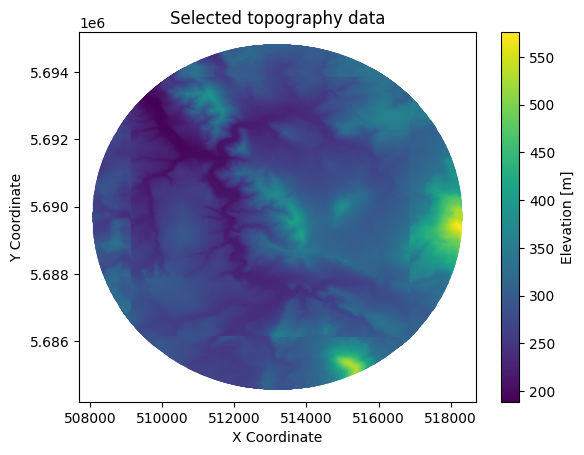

In [15]:
import numpy as np
import matplotlib.pyplot as plt

topo_fname = "RoedeserBerg_large.pts.gz"
topo_data = np.genfromtxt(topo_fname, delimiter = '')
#topo_data = np.loadtxt(topo_fname)

p0 = np.array([513196.5, 5689695.0])
radius = 5000  

# Compute the horizontal distance from p0
distances = np.sqrt(np.sum((topo_data[:, :2] - p0) ** 2, axis=1)) # all rows and first 2 columns, axis=1 means summation in row-wise
selected_data = topo_data[distances < radius]

#selected_fname = 'RoedeserBerg.pts.gz'
#np.savetxt(selected_fname, selected_data)

#num_points = selected_data.shape[0] # number of rows; if [1] then number of columns and .shape, the whole dimension
#print(f'Number of points stored in the file: {num_points}')

#littleTest 
#print(topo_data.shape)
#print(f"form of array with selected data: {selected_data.shape}")

# Plot 
plt.scatter(selected_data[:, 0], selected_data[:, 1], c=selected_data[:, 2]) # x,y and c= marker colors(elevation)
plt.colorbar(label='Elevation [m]')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Selected topography data')


plt.savefig('RoedeserBerg.png', dpi=300)
plt.show()

-------------------------------
## <center> Assignment A5 </center>
-------------------------------
- E1 is assigned to Jiah
- E2 is assigned to Khaled
- E3 is assigned to Juan
- E4 is assigned to Emre
- E5 is assigned to Julia

### E1: APP based on the timeseries

In [2]:
import pandas as pd
import numpy as np
from scipy import interpolate

# Load data
timeseries_df = pd.read_csv('timeseries_la_haute_borne_2017.csv')
power_curve_df = pd.read_csv('Senvion_MM82.csv') #what does df stands for? 

# Constants
rho = 1.225  # density [kg/m^3]
D = 82  # rotor_diameter [m]
T = 8760  # total hours/years [h]
A = np.pi * (D / 2) ** 2 # swept area [m^2]
cut_in_ws = power_curve_df[power_curve_df['P'] > 0]['ws'].min()  
cut_out_ws = power_curve_df[power_curve_df['P'] > 0]['ws'].max()

# Clear NaN Values & Calcualte WS
timeseries_df.fillna(0, inplace=True) # Drop rows where specific columns have NaN values. 'Inplace=True' => modify the data frame directly and'Inplace=False' will return a new data frame.
timeseries_df['WS'] = np.sqrt(timeseries_df['U']**2 + timeseries_df['V']**2)

# Interpolate cp using the power curve
cp_i = interpolate.interp1d(power_curve_df['ws'], power_curve_df['cp']) 

# Function (later more function to be added for other tasks)
def calculate_APP_entire_timeseries(timeseries_df, cp_i):
    
    valid_ws = timeseries_df['WS'].between(cut_in_ws, cut_out_ws, inclusive='both')
    cp = cp_i(timeseries_df['WS'][valid_ws]) 
    delta_t = 10 / 60  # 10 min in 1h
    power = 0.5 * rho * A * cp * timeseries_df['WS'][valid_ws]**3 * delta_t
    APP = power.sum() / T

    print(f"The APP based on the entired timeseries is: {APP/1000:.2f} kW")

    return APP

#Execution
APP_ET = calculate_APP_entire_timeseries(timeseries_df, cp_i)
#print(f"Annaual Energy Production: {314.67*T/1000} MWh\n ")

The APP based on the entired timeseries is: 314.67 kW


#### Notes on E1 / A5 
- 14: boolean condition: 'power_curve_df > 0' applied to 'p' of the dataframe.
The ['ws'].min finds the minimum wind speed for P > 0: finding the min_ws, where the turbine produces power 

- 18: dropna fct: deletes rows with nan-"values". In this case for the U and V velocity components.
For filling the nan values with some other value 'other': time_series_df['U', 'V'].fillna(other, inplace=True)
inplace = Flase would create a new dataframe with the modified rows and coluns instead of replacing the original one. 
- 23: Interpolation function cp_i: we create a interpolation function with ws and cp of the reference data to use it later for the measured data. 
- 29: cp_i(...): applies the interpolation function cp_i to the measured wind speeds. It calculates interpolated values for the power coefficients corresponding to the measured wind speeds WS.BUT only for: subset of wind speeds within the specified range determined by cut_in_ws and cut_out_ws


### E2: APP based on average wind speed

#### Notes E2 from Khaled:
We define a function called read_csv with two parameters (file path ,column).
we use pandas(pd) as a key to read the csv file 
then we extract the specified column from the data frame then return to the selected column.
We define another fun called compute_APP with various parameters
(wind speed ,air density ,swept area, ucut in , ucut out ,wind speed data, power coefficient )
then we return the equation in case  average wind speed within ucut_in and ucut_out wind speed.
Then we go through our main function and set the constants..
according to wind turbine structure the common value of cut_in wind speed is 3 m/s and for cut_out wind speed is 25 m/s.. 
now we read the wind speed file data and calculate the average wind speed.. 
after that we read the power curve data and compute AAP.. finally we call (main) fun

In [21]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def read_csv(file_path, column):
    return pd.read_csv(file_path)[column]

def compute_annual_power_production(U_average, rho, A, Ucut_in, Ucut_out, ws, cp):
    return 0.5 * rho * A * cp_function(U_average) * U_average**3 if Ucut_in < U_average < Ucut_out else 0

def main():                                                                              
    rho, A = 1.225, np.pi * (82 / 2)**2
    Ucut_in, Ucut_out = 3.0, 25.0

    # Read wind speed data
    wind_data = read_csv('timeseries_la_haute_borne_2017.csv', 'U')

    # Check for NaN values and convert to float
    wind_data = wind_data.dropna().astype(float)

    # Calculate average wind speed
    U_average = wind_data.sum() / len(wind_data)  # Total wind speed / Number of data points

    # Read power curve data
    power_curve_data = read_csv('Senvion_MM82.csv', ['ws', 'cp'])

    # Compute annual power production
    APP = compute_annual_power_production(U_average, rho, A, Ucut_in, Ucut_out, power_curve_data['ws'], power_curve_data['cp'])

    print(f"Average Wind Speed: {U_average:.2f} m/s")
    print(f"Annual Power Production (APP): {APP:.2f} kWh")

# Call the main function directly
main()

Average Wind Speed: 1.22 m/s
Annual Power Production (APP): 0.00 kWh


### E3: APP based on binned timeseries (Juan)

In [3]:
import csv
import numpy as np
from scipy import interpolate

# Load data function 
def load_csv(filename):
    with open(filename, 'r') as f:
        reader = csv.reader(f) #read line by line (comma-seperated-values)
        next(reader)
        data = [row for row in reader] #list of lists for data (row-wise)
    return data

#load data
timeseries_data = load_csv('timeseries_la_haute_borne_2017.csv') #list [[time, u, v],[time, u, v],....,[time, u, v]]
power_curve_data = load_csv('Senvion_MM82.csv') #list:[[ws, P,c_t, c_p],[ws, P,c_t, c_p],....,[ws, P,c_t, c_p]]

# Parameters
rho = 1.225  # kg/m^3
D = 82  # m
T = 8760  # h
A = np.pi * (D / 2) ** 2 # m^2
cut_in_ws = min(float(row[0]) for row in power_curve_data if float(row[3]) > 0) #find cut_in_ws
cut_out_ws = max(float(row[0]) for row in power_curve_data if float(row[3]) > 0)

# Fix empty values #but what if only one is nan???? shouldn't we us or istead of and? 
timeseries_data = [row for row in timeseries_data if row[1] != 'NaN' and row[2] != 'NaN']

# Calculate module wind speed
timeseries_data = [row + [np.sqrt(float(row[1])**2 + float(row[2])**2)] for row in timeseries_data] #list [[time, u, v, WS],[time, u, v, WS]...]

# Cp interpolation function with the power curve
cp_i = interpolate.interp1d([float(row[0]) for row in power_curve_data], [float(row[3]) for row in power_curve_data])

# Bin the wind speed data
delta_u = 0.5 # m/s bin width
bins = np.arange(cut_in_ws, cut_out_ws, delta_u) 
timeseries_data = [[*row, np.digitize(row[3], bins)] for row in timeseries_data] #l:[[time, u, v, WS, bin_index],[time, u, v, WS, bin_index]...]
#bin_index= 0 for ws: 4.0 - 4.5 / bin_index= 1 for 4.5 - 5.0 ...

# Calculate the normalized frequency for each bin:
bin_counts = {} #dict with counts for every ws btw cut_in and cut_out in 0.5 steps 
for row in timeseries_data:
    bin_counts[row[4]] = bin_counts.get(row[4], 0) + 1 #key = value, +1 to jump to the next index 
total_count = len(timeseries_data)

normalized_frequencies = {}  # Create an empty dictionary to store the results
for bin, count in bin_counts.items():
    weighted_value = bin * delta_u + cut_in_ws #representative value for the bin: example: bin 0 = ws 4.0 
    normalized_frequency = count / total_count #normalized frequency for the bin
    normalized_frequencies[weighted_value] = normalized_frequency #result to dict: how often we have for ex.: 4.0 m/s in freq.: 4.0: 0.23073

# Function to calculate APP based on binned timeseries
def calculate_APP_binned_timeseries(normalized_frequencies, cp_i):
    APP = 0
    APP = sum(0.5 * P_i * rho * cp_i(bin_center) * A * bin_center**3 for bin_center, P_i in normalized_frequencies.items())

    print(f"The APP based on the binned timeseries is: {APP/1000:.2f} kW")

    return APP

APP_BT = calculate_APP_binned_timeseries(normalized_frequencies, cp_i)

The APP based on the binned timeseries is: 375.56 kW


#### Notes for E3:
- 8: csv.reader fct: used to read data from a CSV (Comma-Separated Values) -> reader object is then used to iterate over the rows in the CSV file.
- 37: *row ->unpacking elements of original row list -> appending the bin index calculated by np.digitize to a 5th column 
- 42: bin_counts.get(row[4], 0): get() method for dictionaries -> tries to call the value associated with the key row[4] in the bin_counts dict If the key is present, it returns the associated value; otherwise, it returns the default value, which is 0 in this case.
- 42:  +1 : if the key row[4] is already present in bin_counts, it increments its value by 1

normalized_frequencies = {bin * delta_u + cut_in_ws: count / total_count for bin, count in bin_counts.items()} #juans thing

Some tests: 
print(type(bins))
print(type(timeseries_datax))
print(timeseries_data[:25])

### E4: Fit of the Weilbull Curve and determine APP from it 

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.integrate import quad

# Load timeseries data from CSV
file_path_timeseries = 'timeseries_la_haute_borne_2017.csv'
df_timeseries = pd.read_csv(file_path_timeseries)
wind_speed_data = df_timeseries['U'].values

# Load power curve data
file_path_power_curve = 'Senvion_MM82.csv'
df_power_curve = pd.read_csv(file_path_power_curve)
wind_speed_power_curve = df_power_curve['U'].values
power_coefficient_curve = df_power_curve['cp'].values
U_cut_in, U_cut_out = df_power_curve['U Cut-in (m/s)'].values[0], df_power_curve['U Cut-out (m/s)'].values[0]
cp_values = df_timeseries['cp'].values

# Interpolate cp values
cp_interp = interp1d(wind_speed_data, cp_values, kind='linear', fill_value='extrapolate')

# Fit a Weibull distribution to the data
shape, loc, scale = weibull_min.fit(wind_speed_data)

# Calculate APP from the fitted Weibull curve
P = lambda U: weibull_min.pdf(U, shape, loc, scale)
A = np.pi * (82 / 2)**2  # Rotor area for the given rotor diameter (D = 82m)

def calculate_cp(U):
    cp_value = cp_interp(U)
    return cp_value

def calculate_power(U):
    cp_value = calculate_cp(U)
    rho = 1.225  # Air density
    rotor_diameter = 82.0  # Rotor diameter in meters
    total_hours_per_year = 8760.0
    power = 0.5 * rho * A * U**3 * cp_value
    return power * total_hours_per_year / 1e6  # Convert to MWh

# Create a histogram of the data
plt.hist(wind_speed_data, bins=30, density=True, alpha=0.7, label='Histogram')

# Plot the fitted Weibull distribution
x = np.linspace(min(wind_speed_data), max(wind_speed_data), 100)
plt.plot(x, P(x, shape, loc, scale), 'r', label='Fitted Weibull')

plt.title('Wind Speed Distribution and Fitted Weibull')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density Function')
plt.legend()
plt.show()

# Print the calculated APP
app_result, _ = quad(lambda U: calculate_power(U), U_cut_in, U_cut_out)
print(f"Annual Energy Production (APP) from the fitted Weibull curve: {app_result} MWh")


FileNotFoundError: [Errno 2] No such file or directory: 'timeseries_la_haute_borne_2017.csv'

### E5: Drainage of the Water Tank 

#### Notes for A5/E5:

- message: The solver successfully reached the end of the integration interval. - The numerical solver completed the integration successfully, reaching the specified end time.
- success: True - The integration process was successful without encountering errors.
- status: 0 - The solver status indicating successful completion without issues.
- sol: None - The solution object is not available: no errors during calc. solution
- t_events: None - There are no specific event times specified for the solver to track.
- y_events: None - same for y 
- nfev: 2174 - The number of evaluations of the system of ordinary differential equations (ODEs) during the integration process.
- njev: 0 - The number of Jacobian matrix evaluations during the integration (Jacobian is not used, as it's 0).
- nlu: 0 - The number of LU (lower-upper) factorizations during the integration (0 indicates none performed).

Solution by the solve_ivp:

   message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  4.481e-01 ...  3.595e+03  3.600e+03]
        y: [[ 2.500e+01  2.499e+01 ...  6.984e-04  3.769e-04]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2174
     njev: 0
      nlu: 0 



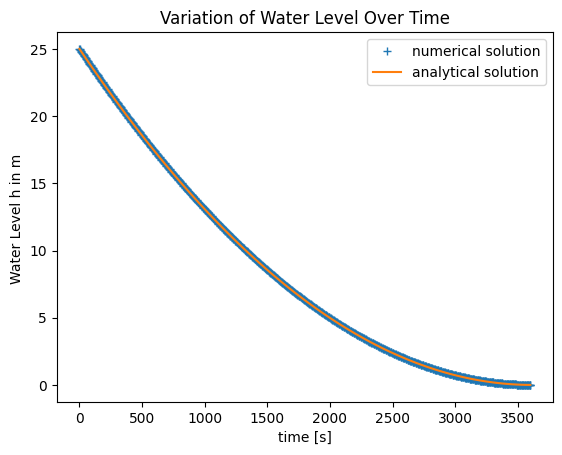

In [5]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Given parameters
D = 20 # diameter of the tank
h0 = 25  # initial water level h(t=0)=h0
g = 9.8  # acceleration due to gravity
d = 0.5  # diameter of the pipe
t_max = 3600  # 1 hour in seconds
t = np.linspace(0, t_max, 100) # Time points

# Analytical solution
def analytical_solution(t):
    return (- np.sqrt(g / 2) * (d ** 2 / D ** 2) * t + np.sqrt(h0))**2

# Define the ODE model function
def numerical_solution(t,h):
    dhdt = -(np.sqrt(2 * g) * (d ** 2 / D ** 2) * np.sqrt(h))
    return dhdt

# Solve the ODE for the given parameters: 
h_solution = integrate.solve_ivp(numerical_solution, (0, t_max), [h0], max_step=10.0)
print("Solution by the solve_ivp:\n\n", h_solution, "\n")

# Plotting
fig, ax = plt.subplots()

sol = integrate.solve_ivp(numerical_solution, (0, t_max), [h0],  max_step = 5)
ax.plot(sol.t, sol.y[0,:], "+", label="numerical solution")
ax.plot(t, analytical_solution(t),  label= "analytical solution")

ax.legend()
ax.set_xlabel("time [s]")
ax.set_ylabel("Water Level h in m ")
plt.title('Variation of Water Level Over Time')
plt.show()

-------------------------------
## <center> Assignment A6 </center>
-------------------------------


## E1. Populating a Pandas DF from NP array 

In [4]:
import numpy as np
import pandas as pd

#########################################E1.a#########################################
random_array = np.random.randint(0, 20, size=(2, 24)) #array shape: (2, 24)
#print(random_array)

#########################################E1.b#########################################
# directly from the array
df_direct = pd.DataFrame(random_array.T, columns=['Data1', 'Data2']) #T. for transpose 

#dict from np.array 
random_dict = {}
for index, row in enumerate(random_array):
    random_dict[f"Data {index + 1}"] = row
df_dict = pd.DataFrame(random_dict)


# from two pd.Series objects created from the individual array columns
serie1_df = pd.Series(random_array[1,:])
serie2_df = pd.Series(random_array[0,:])

series_combined  = pd.DataFrame() #empty data frame 
# Now we can add the columns one-by-one:
series_combined["Data 1"] = serie1_df
series_combined["Data 2"] = serie2_df

print(f"E1.b1\n:{df_direct}") #E1.b1
print()
print(f"E1.b2\n:{df_dict}")  #E1.b2
print()
print(f"E1.b3\n:{series_combined}") #E1.b3
#########################################E1.c#########################################

series_combined["DataProd"] = series_combined["Data 1"]*series_combined["Data 2"]
print("E1.c")
print(series_combined)


E1.b1
:    Data1  Data2
0       4      1
1      19      9
2       6     17
3       8     19
4      11     13
5       7     16
6       9     16
7       5     15
8      18     10
9       0     17
10     18      7
11      8     18
12     17     13
13      3     16
14      4     10
15     15      4
16     15     13
17      5      1
18     10     12
19     15      2
20     11      7
21     19     11
22     12     17
23      3     13

E1.b2
:    Data 1  Data 2
0        4       1
1       19       9
2        6      17
3        8      19
4       11      13
5        7      16
6        9      16
7        5      15
8       18      10
9        0      17
10      18       7
11       8      18
12      17      13
13       3      16
14       4      10
15      15       4
16      15      13
17       5       1
18      10      12
19      15       2
20      11       7
21      19      11
22      12      17
23       3      13

E1.b3
:    Data 1  Data 2
0        1       4
1        9      19
2       17       6
3

## E2.: Exporting and Importing Dataframe

In [7]:
#########################################E2.a#########################################
series_combined = series_combined.astype(np.float64)
#print(series_combined.dtypes) #print data type for whole dataframe

#########################################E2.b#########################################
series_combined.to_csv('series_df.csv', index=False, float_format='%.2f') #index= True or False to include / exclude the index column 

#########################################E2.d#########################################
df = pd.read_csv('series_df2.csv', delimiter=';')

# Print the DataFrame
print(df)

#what happened with the blank rows? 
print()
print(f"Data type of Error-cell: {type(df['Error-Log'][2])}") 
print(f"Data type of blank cell: {type(df['Error-Log'][0])}")  
print(f"Data type new column: {type(df['Error-Log'])}")


    Data 1  Data 2  DataProd Error-Log
0      9.0     9.0      81.0          
1     13.0     5.0      65.0          
2      6.0    11.0      66.0     Error
3     17.0     0.0       0.0          
4     16.0     2.0      32.0          
5      5.0    14.0      70.0     Error
6      3.0     2.0       6.0          
7     17.0     1.0      17.0          
8      4.0     5.0      20.0          
9     18.0    10.0     180.0          
10     4.0     8.0      32.0          
11    15.0    17.0     255.0     Error
12     9.0    19.0     171.0     Error
13    11.0    12.0     132.0     Error
14    14.0    16.0     224.0     Error
15    15.0     8.0     120.0          
16     3.0    14.0      42.0     Error
17    13.0     2.0      26.0          
18     1.0     1.0       1.0          
19     7.0    10.0      70.0          
20    18.0     6.0     108.0          
21    18.0    12.0     216.0     Error
22     1.0     1.0       1.0          
23    16.0     4.0      64.0          

Data type of Error-cell: